# Modelo para dois diretorios train e validation


In [1]:
!pip install tensorflow matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
import numpy as np

# Carregando as configurações
data_base_path = 'C:\\Users\\User\\Downloads\\Imagens\\base_de_dados\\'  # Diretório da base de dados
dir_train = os.path.join(data_base_path, 'treino').replace(os.path.sep, '\\')  # Diretório de treinamento
dir_validation = os.path.join(data_base_path, 'validacao').replace(os.path.sep, '\\')  # Diretório de validação

# Definindo parâmetros
batch_size = 32  # Tamanho do lote
img_width, img_height = 180, 180  # Largura e altura das imagens
img_size = (img_width, img_height)  # Tamanho das imagens
epochs = 20  # Número de épocas de treinamento
learning_rate = 0.0001  # Taxa de aprendizagem

# Separando os conjuntos de dados
train_ds = tf.keras.utils.image_dataset_from_directory(
    dir_train,
    shuffle=True,
    image_size=img_size,
    batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dir_validation,
    shuffle=True,
    image_size=img_size,
    batch_size=batch_size,
)

# Obtendo os nomes das classes
nomes_classes = train_ds.class_names
num_classes = len(nomes_classes)  # Número de classes

# Separando um conjunto de teste do conjunto de validação
val_ds_card = tf.data.experimental.cardinality(val_ds)
lotes_val_ds = val_ds_card // 3 # Número de lotes para teste

test_ds = val_ds.take(lotes_val_ds)  # Conjunto de teste
val_ds = val_ds.skip(lotes_val_ds)  # Conjunto de validação ajustado

# Exibindo informações sobre os conjuntos de dados
print('Cardinalidade do Conjunto de Validação:', tf.data.experimental.cardinality(val_ds))
print('Cardinalidade do Conjunto de Teste:', tf.data.experimental.cardinality(test_ds))


Found 195 files belonging to 4 classes.
Found 46 files belonging to 4 classes.
Cardinalidade do Conjunto de Validação: tf.Tensor(2, shape=(), dtype=int64)
Cardinalidade do Conjunto de Teste: tf.Tensor(0, shape=(), dtype=int64)


In [7]:

# Configurando o desempenho automático
AUTOTUNE = tf.data.AUTOTUNE

# Pré-processamento dos conjuntos de dados
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Normalização das imagens
shape = (img_width, img_height, 3)  # Forma das imagens normalizadas


In [8]:

# Criando o modelo de rede neural
model = tf.keras.Sequential([
    # data_augmentation,  # Adicionando Data Augmentation
    Rescaling(1./255,input_shape=shape),
    Conv2D(16, (3, 3), padding='same',activation='relu'),  # Menor número de filtros
    MaxPooling2D(),
    Conv2D(32, (3, 3), padding='same',activation='relu'),  # Menor número de filtros
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),  # Menor número de unidades
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])


# Compilando o modelo
model.compile(
    optimizer='adam',  # Otimizador Adam
    loss='sparse_categorical_crossentropy',  # Perda categórica cruzada esparsa (multi-classe)
    metrics=['accuracy'],  # Métricas a serem monitoradas (precisão)
)

# Resumo do modelo
model.summary()


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     4,147,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,152,612 (15.84 MB)

 Trainable params: 4,152,612 (15.84 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.callbacks import *

# Callbacks
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    # save_best_only=True,
    # save_weights_only=False,
    mode='min',
    verbose=1
)


history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping, checkpoint_callback]
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.3064 - loss: 1.3361
Epoch 1: saving model to best_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - accuracy: 0.3116 - loss: 1.3301 - val_accuracy: 0.5000 - val_loss: 1.2370 - learning_rate: 4.0000e-05
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.4214 - loss: 1.2465
Epoch 2: saving model to best_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - accuracy: 0.4168 - loss: 1.2489 - val_accuracy: 0.5000 - val_loss: 1.2456 - learning_rate: 4.0000e-05
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.3973 - loss: 1.2740
Epoch 3: saving model to best_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step - accuracy: 0.3945 - loss: 1.2709 - val_accuracy: 0.5000 - val_loss: 1.2570 - learning_rate: 4.0000e-05
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.4500 - loss: 1.2649
Epoch 4: saving model to best_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - accuracy: 0.4482 - loss: 1

ValueError: x and y must have same first dimension, but have shapes (1,) and (6,)

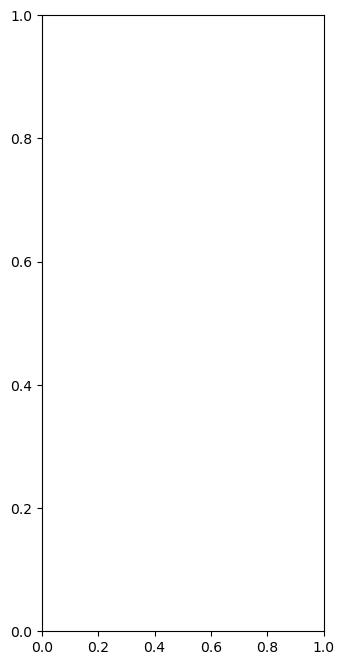

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

faixa_epochs = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(faixa_epochs, acc, label='Treino Accuracy')
plt.plot(faixa_epochs, val_acc, label='Validacao Accuracy')

plt.legend(loc='lower right')
plt.title('Treino and Validacao Accuracy')

plt.subplot(1, 2, 2)
plt.plot(faixa_epochs, loss, label='Treino Loss')
plt.plot(faixa_epochs, val_loss, label='Validacao Loss')
plt.legend(loc='upper right')
plt.title('Treino and Validacao Loss')
plt.show()

In [ ]:
import numpy as np
def plot_one_img(img,score):
    # Plotar a imagem
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(f'Classificada como {nomes_classes[np.argmax(score)]}\ncom uma precisão de {100 * np.max(score):.2f}%')
    plt.axis('off')
    plt.show()
    
def classificar_for_wpp(path_img):
    img = tf.keras.utils.load_img(
        path_img, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    # plot_one_img(img,score)
    print(
        f"classificada como {nomes_classes[np.argmax(score)]} \ncom uma accuracy de {100 * np.max(score):.2f} %."
    )
classificar_for_wpp(r'C:\Users\User\Desktop\modelo_classifier\imagens_para_teste\escassa (31).jpg')
classificar_for_wpp(r'C:\Users\User\Desktop\modelo_classifier\imagens_para_teste\mediana (16).jpg')
classificar_for_wpp(r'C:\Users\User\Desktop\modelo_classifier\imagens_para_teste\uniforme (13).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
classificada como Uniforme 
com uma accuracy de 33.83 %.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
classificada como Uniforme 
com uma accuracy de 33.97 %.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
classificada como Escassa 
com uma accuracy de 33.85 %.
